<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Ranosz_testowy/19_03_pum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

path = "/content/Salary Data (2).csv"
df1 = pd.read_csv(path, sep=",")
df1= df1.dropna()
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [42]:
from sklearn.linear_model import LinearRegression
X = np.array([[1,1], [1,2], [2,2], [2,3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1,2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X,y)

1.0

In [43]:
reg.coef_

array([1., 2.])

In [44]:
reg.intercept_

3.0000000000000018

In [45]:
reg.predict(np.array([[3,5]]))

array([16.])

In [46]:
df1.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [47]:
# stwórz obiekt enkodera
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1["Education Level"] = le.fit_transform(df1["Education Level"])
for column in df1.columns:
  if pd.api.types.is_object_dtype(df1[column]):
    print(column)
    df1[column] = le.fit_transform(df1[column])
# sprawdź transformacje
df1.head()

Gender
Education Level
Job Title


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [48]:
from sklearn.impute import SimpleImputer
train_df, test_df = train_test_split(df1, test_size=0.3, random_state=42)
# Use mean as the imputation strategy
imputer = SimpleImputer(strategy='mean')
# Fit on the training data
imputer.fit(train_df)
# Transform both training and testing data
train_df = pd.DataFrame(imputer.transform(train_df), columns=train_df.columns)

In [49]:
model = LinearRegression().fit(train_df, train_df['Salary'])
prediction = model.predict(test_df)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test_df['Salary'], prediction)
mse = mean_squared_error(test_df['Salary'], prediction)
rmse = np.sqrt(mse)
r2 = r2_score(test_df['Salary'], prediction)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 2.0391561455263788e-11
MSE: 6.253098843979565e-22
RMSE: 2.5006196919922798e-11
R2 Score: 1.0


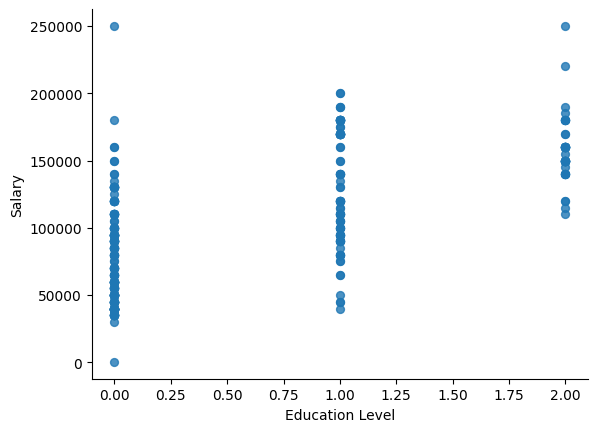

In [51]:
df1.plot(kind='scatter', x='Education Level', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

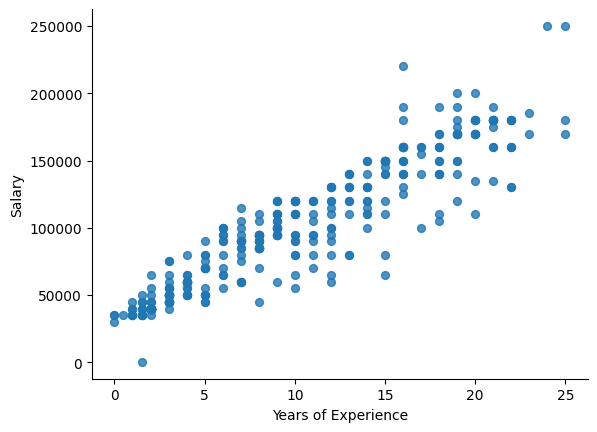

In [52]:
# @title Years of Experience vs Salary

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='Years of Experience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)